## Weekly trends plot for different years
* resampling frequency is 3 Days
* various rates of the chlor-a concentration
* "fixed scale" seems more illustrative than the "min-max scale"

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load CSV output    
#plt = plt.figure(8,6)
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()

freq = 3
pref = 'df_chl_dist_out_'
surf =  '_modisa.csv'
infile = pref + str(freq) + 'D' + surf

folder = '../data_collector_modisa_chla9km/df_multidimInterpolation/'
direc = folder + infile
direc

print('in_filename and path:', direc)

df_tmp = pd.read_csv(direc, index_col='index')
df_tmp.sort_values(['id', 'time'])[:20]

in_filename and path: ../data_collector_modisa_chla9km/df_multidimInterpolation/df_chl_dist_out_3D_modisa.csv


,time,id,lon,var_tmp,spd,vn,lat,ve,temp,var_lon,...,chlor_a_log_e,chl_rate,chl_log_e_rate,chl_rate_stand,chl_log_e_rate_stand,chl_rate_week,chl_log_e_rate_week,week,week_rotate,dist
index,,,,,,,,,,,,,,,,,,,,,
1,2002-11-01,10206,67.486500,1000.000000,10.972417,6.091083,10.753083,-7.563917,NaN,0.000629,...,-2.030119,-0.001671,-0.012490,-0.006527,-0.060506,-0.011699,-0.087430,44,1,505.491215
260,2002-11-04,10206,67.315250,1000.000000,11.224333,6.904000,10.885583,-6.069667,NaN,0.001747,...,-1.938894,0.004181,0.030408,-0.001133,0.176520,0.029267,0.212859,45,2,522.902296
519,2002-11-07,10206,67.174083,1000.000000,10.497583,6.697417,11.064250,-5.759333,NaN,0.000558,...,-2.031194,-0.004228,-0.030767,-0.008883,-0.161490,-0.029596,-0.215366,45,2,537.307712
778,2002-11-10,10206,67.124333,1000.000000,2.176333,0.621000,11.149750,1.226750,NaN,0.002349,...,-2.061322,-0.001298,-0.010043,-0.006182,-0.046985,-0.009084,-0.070300,45,2,542.525785
1037,2002-11-13,10206,67.097583,1000.000000,3.665833,1.653917,11.164667,-2.118667,NaN,0.001697,...,-1.958813,0.004580,0.034170,-0.000766,0.197302,0.032060,0.239187,46,3,545.427044
1296,2002-11-16,10206,67.073500,1000.000000,2.935500,-1.424917,11.170667,-2.091167,NaN,0.009975,...,-1.954394,0.000208,0.001473,-0.004795,0.016643,0.001457,0.010311,46,3,548.049296
2073,2002-11-25,10206,66.984333,1000.000000,3.872917,3.004750,11.257917,-2.264750,NaN,0.005760,...,-2.021951,-0.002713,-0.019889,-0.007487,-0.101387,-0.018994,-0.139223,48,5,557.768276
2332,2002-11-28,10206,66.894750,1000.000000,5.937833,2.495417,11.322667,-5.209000,NaN,0.000845,...,-1.995907,0.001164,0.008681,-0.003913,0.056472,0.008151,0.060770,48,5,567.645430
2591,2002-12-01,10206,66.684000,1000.000000,12.573333,3.490667,11.384667,-11.984083,NaN,0.003508,...,-1.977466,0.000843,0.006147,-0.004210,0.042470,0.005902,0.043030,48,5,590.806790


In [3]:
df_tmp['time'] = pd.to_datetime(df_tmp['time']) # ,format='%m/%d/%y %I:%M%p'
df_timed = df_tmp.set_index('time')
# add a new column to the dataset
df_timed['year'] = df_timed.index.year
df_timed[:20]

year_max = df_timed.index.year.max()
year_min = df_timed.index.year.min()
print('year_max', year_max)
print('year_min', year_min)
#print(df_timed)

year_max 2016
year_min 2002



 summary statistics of chl_rate_week for the year 2002 

count    82.000000
mean      0.018040
std       2.750289
min     -16.620588
25%      -0.028692
50%       0.006149
75%       0.059554
max      18.069946
Name: chl_rate_week, dtype: float64


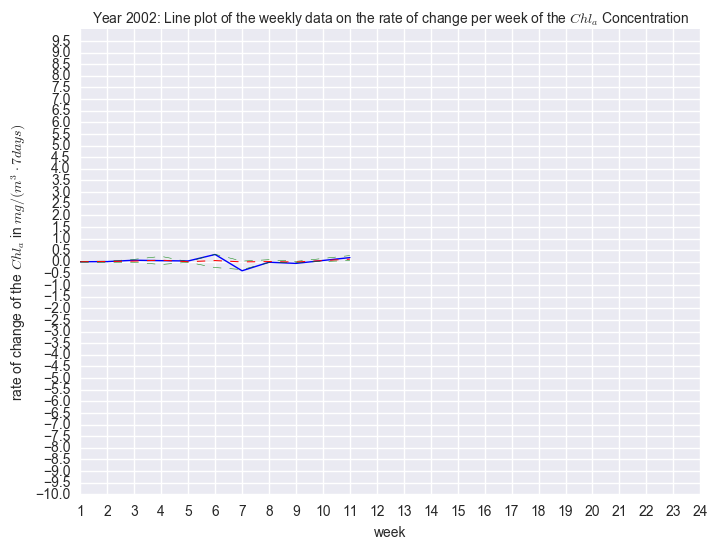

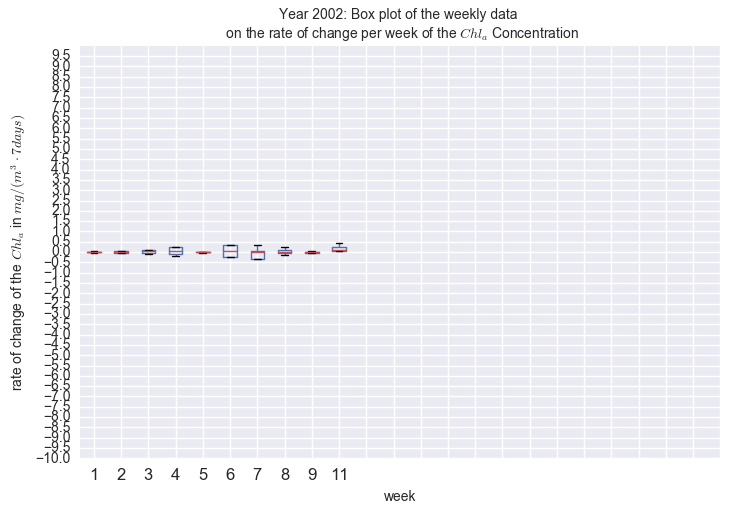


 summary statistics of chl_rate_week for the year 2003 

count    87.000000
mean     -0.007893
std       7.982092
min     -39.579646
25%      -0.189169
50%      -0.021236
75%       0.121171
max      50.954586
Name: chl_rate_week, dtype: float64


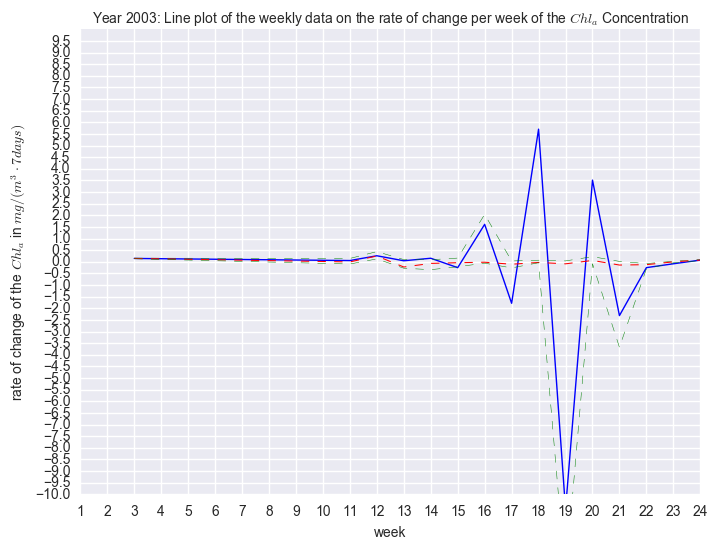

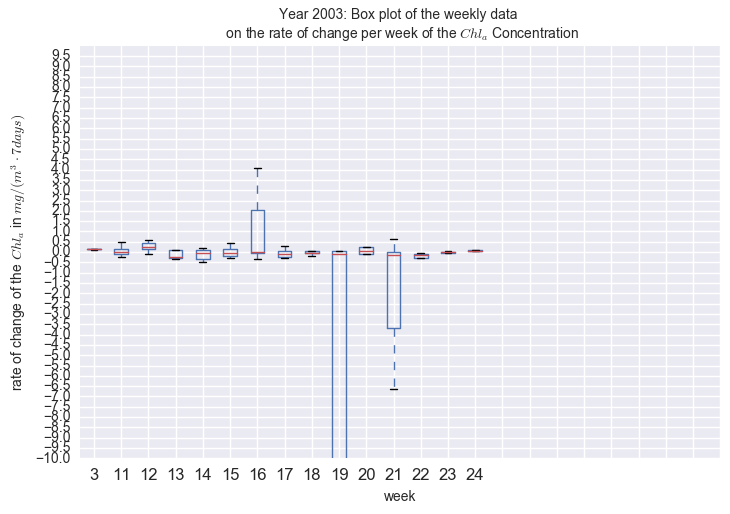


 summary statistics of chl_rate_week for the year 2004 

count    12.000000
mean     -0.006287
std       0.125709
min      -0.235146
25%      -0.046752
50%      -0.017085
75%       0.003117
max       0.329000
Name: chl_rate_week, dtype: float64


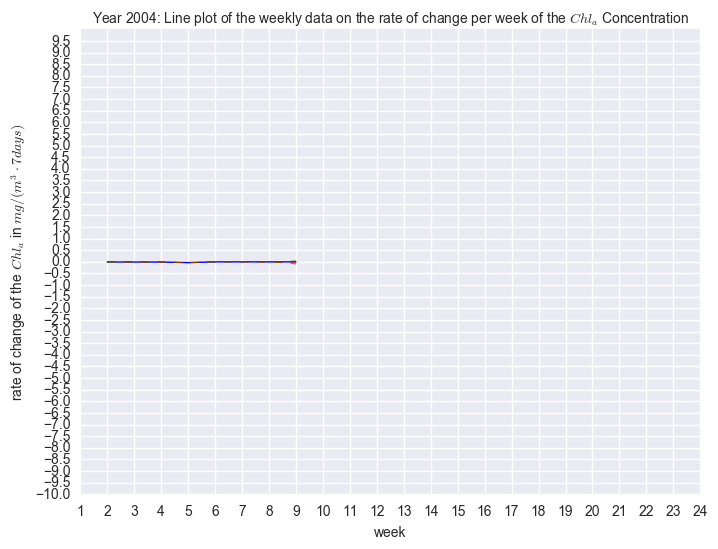

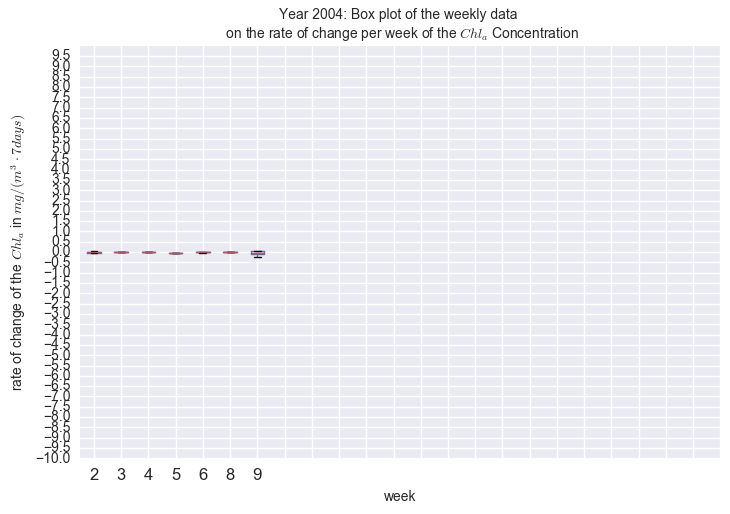


 summary statistics of chl_rate_week for the year 2005 

count    82.000000
mean     -0.007288
std       0.157394
min      -0.460222
25%      -0.075228
50%       0.001926
75%       0.049310
max       0.461057
Name: chl_rate_week, dtype: float64


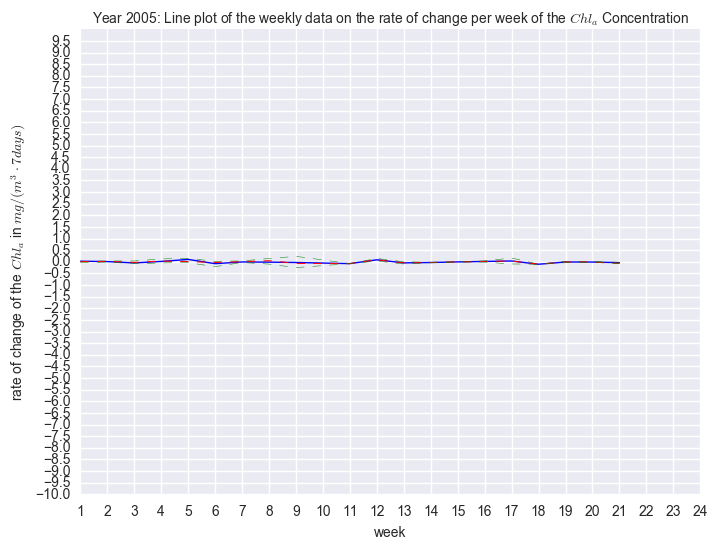

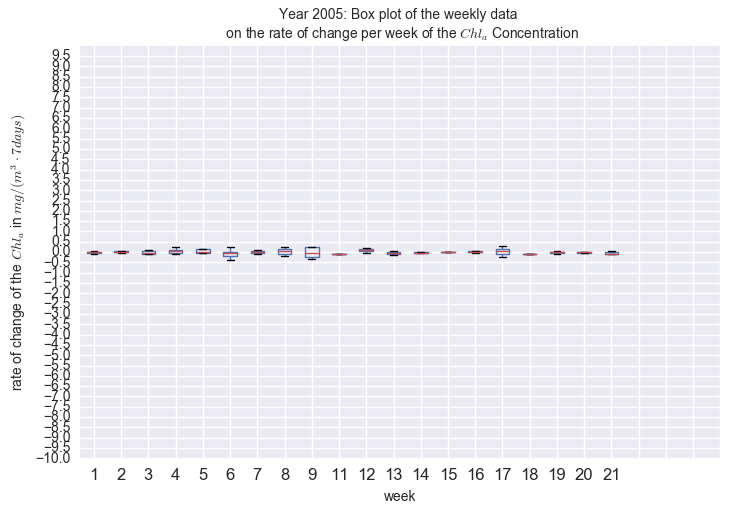


 summary statistics of chl_rate_week for the year 2006 

count    178.000000
mean      -0.032413
std        0.576733
min       -3.014137
25%       -0.074983
50%       -0.008111
75%        0.053478
max        2.551937
Name: chl_rate_week, dtype: float64


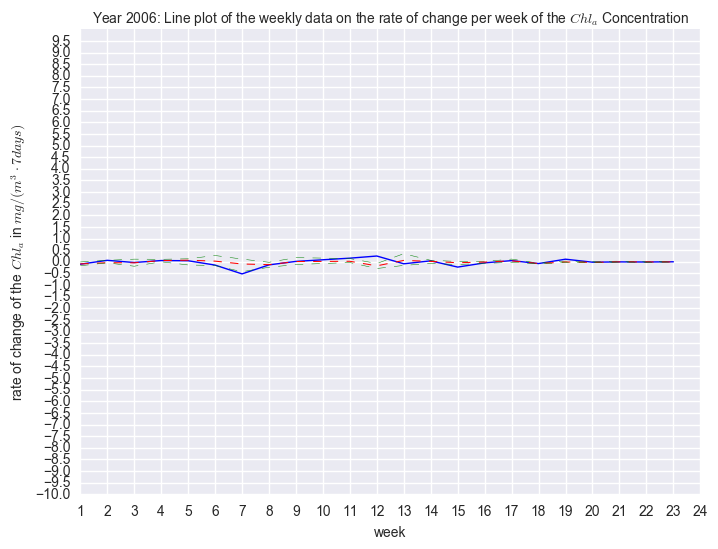

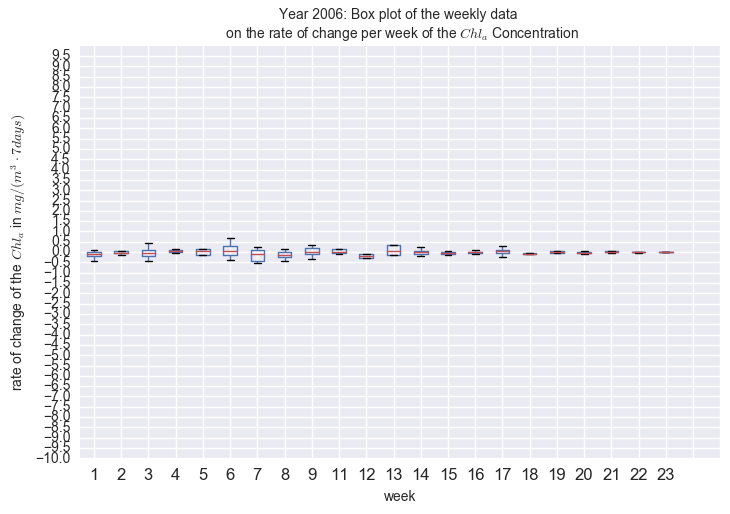


 summary statistics of chl_rate_week for the year 2007 

count    178.000000
mean       0.027848
std        0.274122
min       -0.782113
25%       -0.048881
50%        0.004848
75%        0.055818
max        1.400957
Name: chl_rate_week, dtype: float64


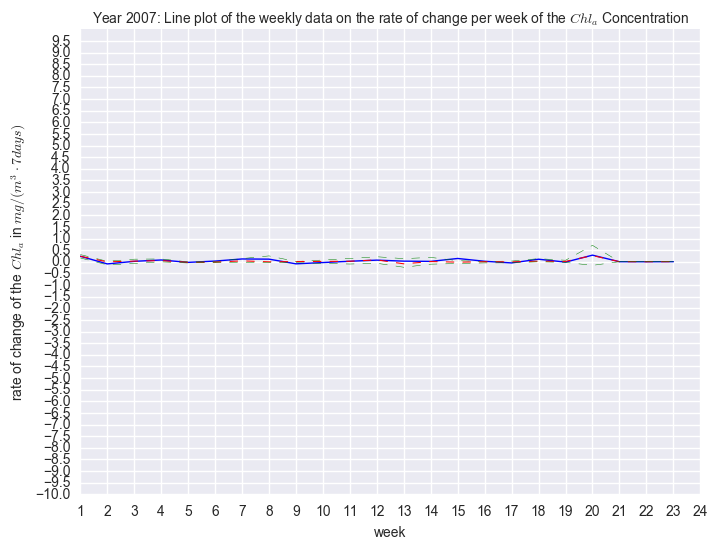

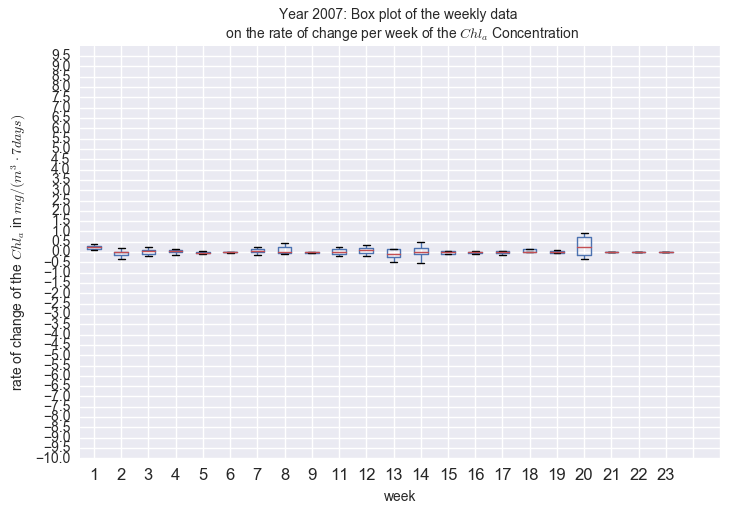


 summary statistics of chl_rate_week for the year 2008 

count    259.000000
mean       0.131467
std       10.627156
min      -61.839489
25%       -0.103302
50%       -0.009343
75%        0.062911
max       54.051938
Name: chl_rate_week, dtype: float64


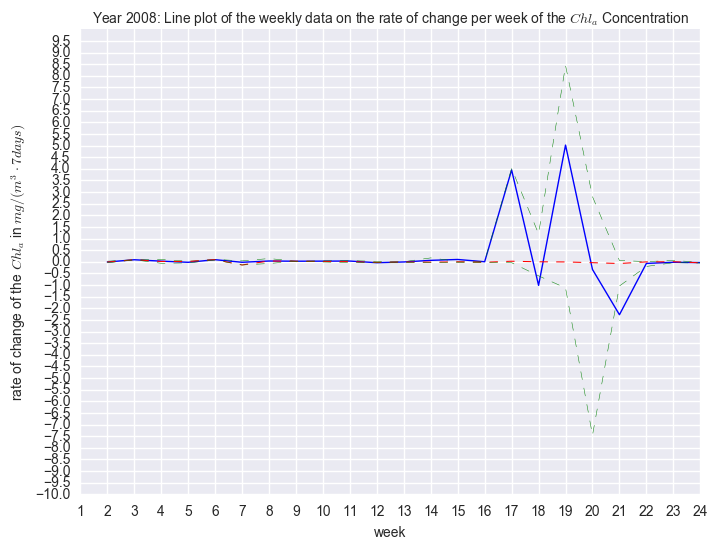

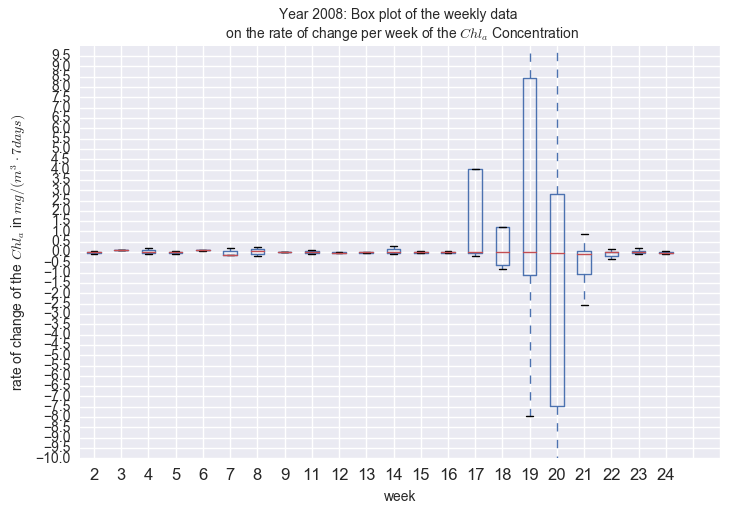


 summary statistics of chl_rate_week for the year 2009 

count    82.000000
mean     -0.093711
std       0.614357
min      -3.429726
25%      -0.045113
50%      -0.008625
75%       0.027586
max       2.120321
Name: chl_rate_week, dtype: float64


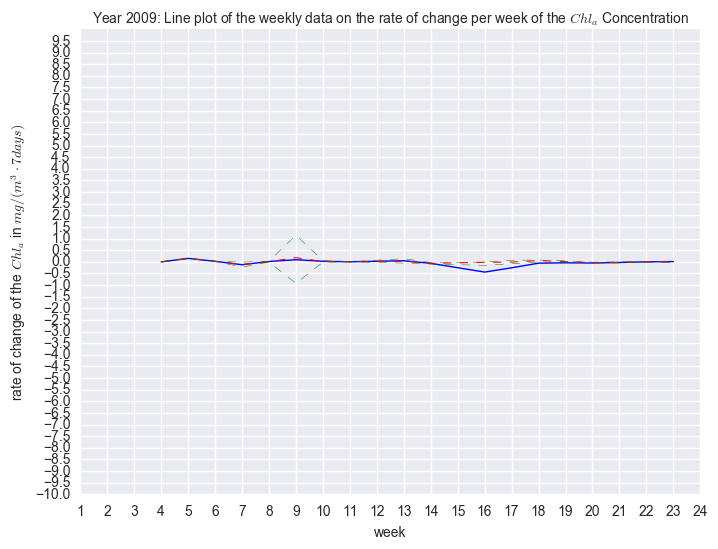

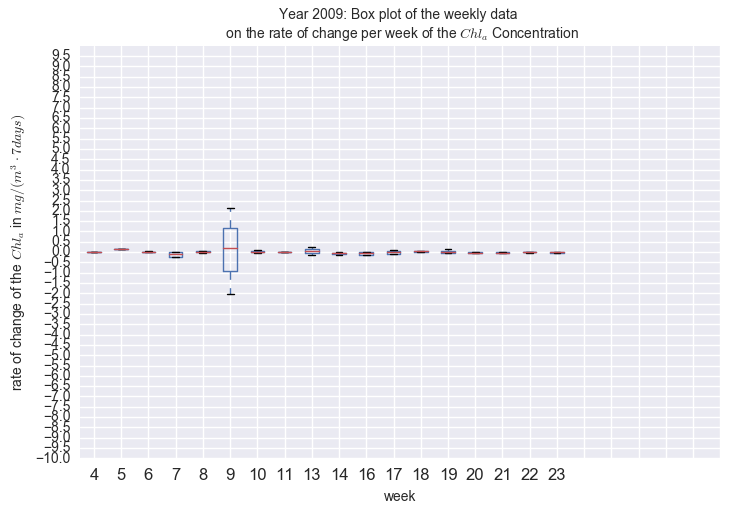


 summary statistics of chl_rate_week for the year 2010 

count    130.000000
mean      -0.020785
std        0.148114
min       -0.625943
25%       -0.069372
50%       -0.008048
75%        0.042783
max        0.451029
Name: chl_rate_week, dtype: float64


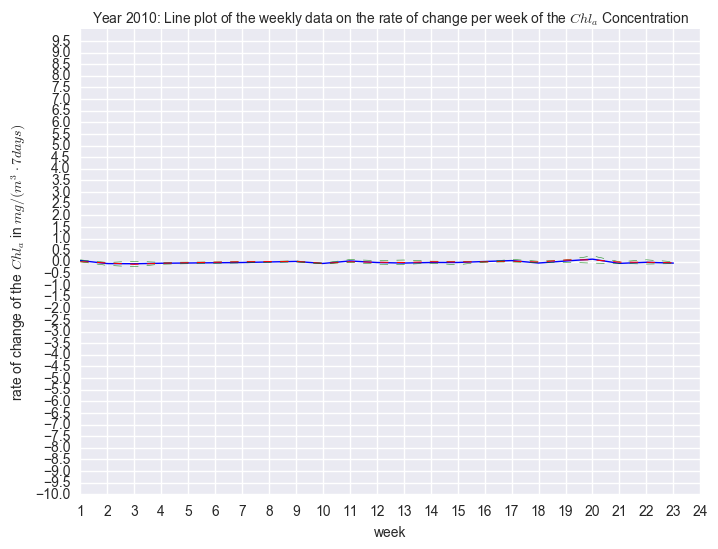

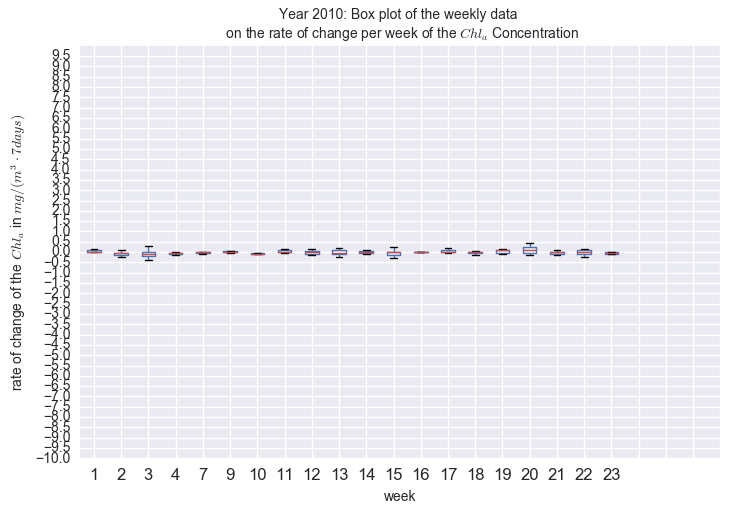


 summary statistics of chl_rate_week for the year 2011 

count    29.000000
mean     -0.031564
std       0.275780
min      -0.914593
25%      -0.098353
50%       0.013578
75%       0.066043
max       0.374917
Name: chl_rate_week, dtype: float64


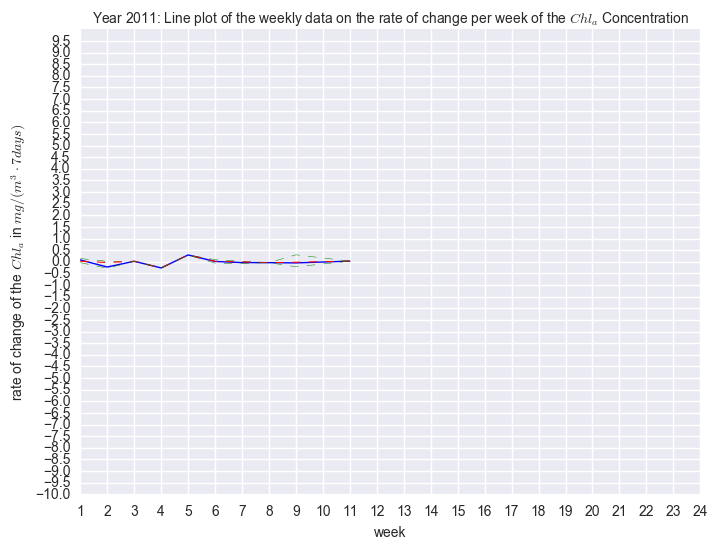

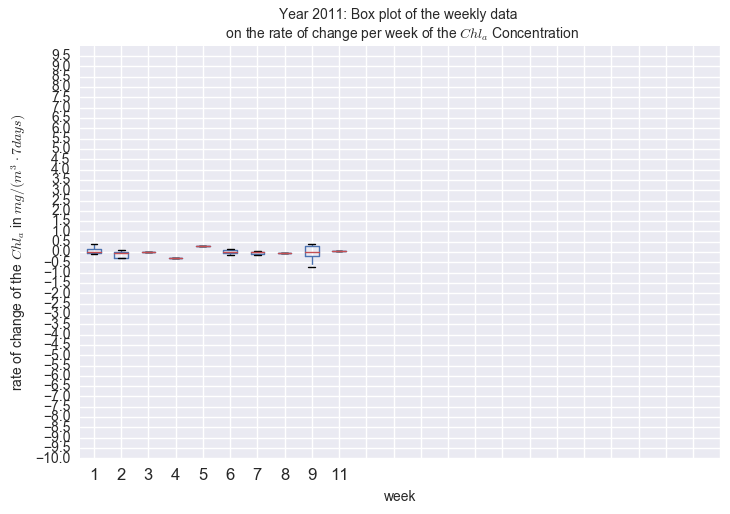


 summary statistics of chl_rate_week for the year 2012 

count    85.000000
mean     -0.659762
std       8.562160
min     -53.595121
25%      -0.234686
50%       0.004579
75%       0.252841
max      32.845773
Name: chl_rate_week, dtype: float64


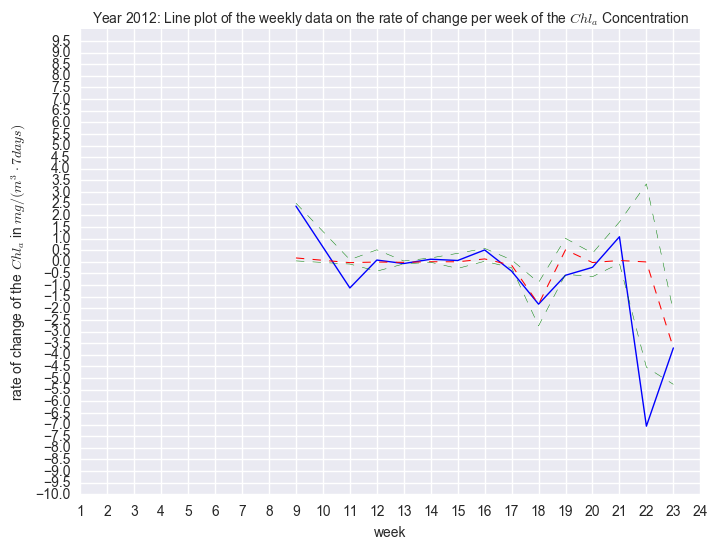

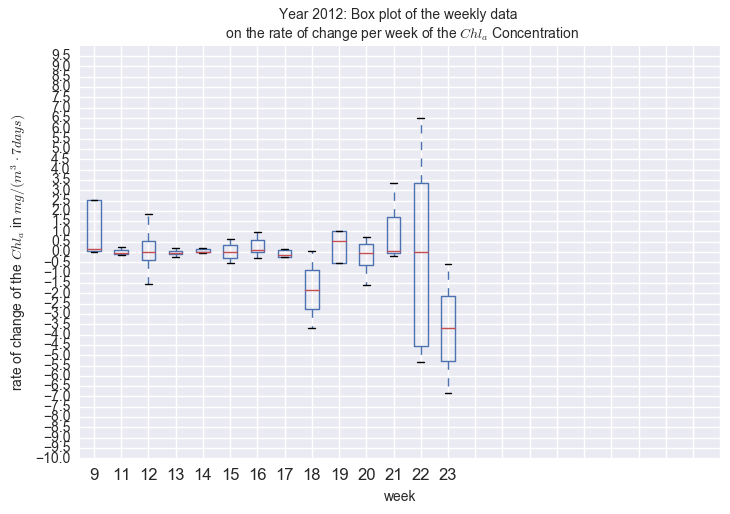


 summary statistics of chl_rate_week for the year 2013 

count    79.000000
mean      0.045618
std       0.487845
min      -2.276181
25%      -0.172274
50%      -0.023059
75%       0.166350
max       1.711946
Name: chl_rate_week, dtype: float64


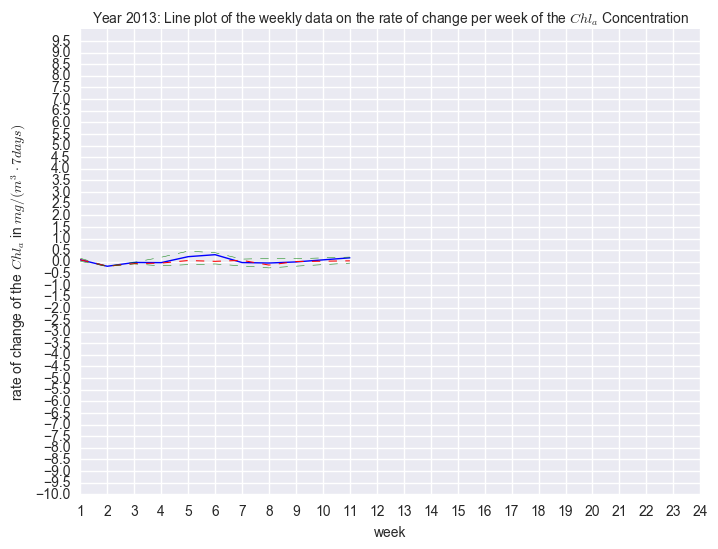

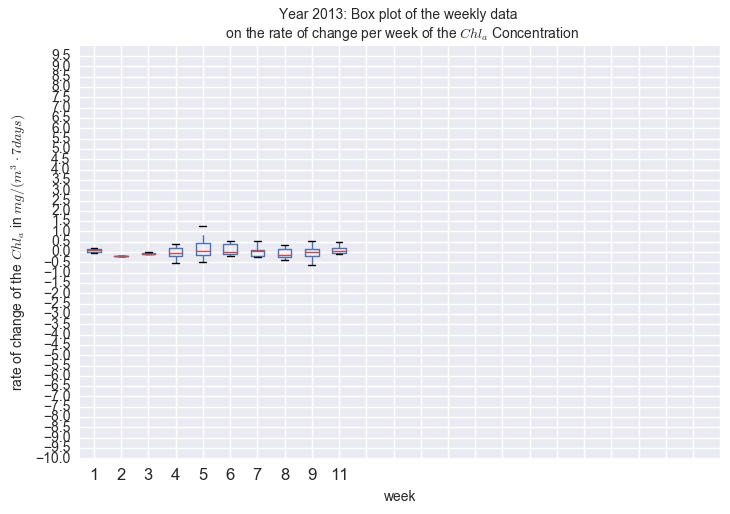


 summary statistics of chl_rate_week for the year 2014 

count    330.000000
mean       0.059902
std        6.863299
min      -62.973166
25%       -0.214078
50%        0.002189
75%        0.262333
max       61.513136
Name: chl_rate_week, dtype: float64


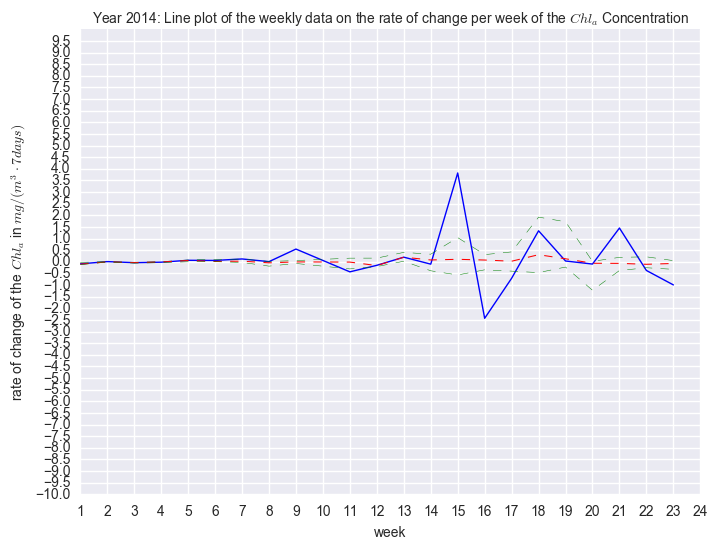

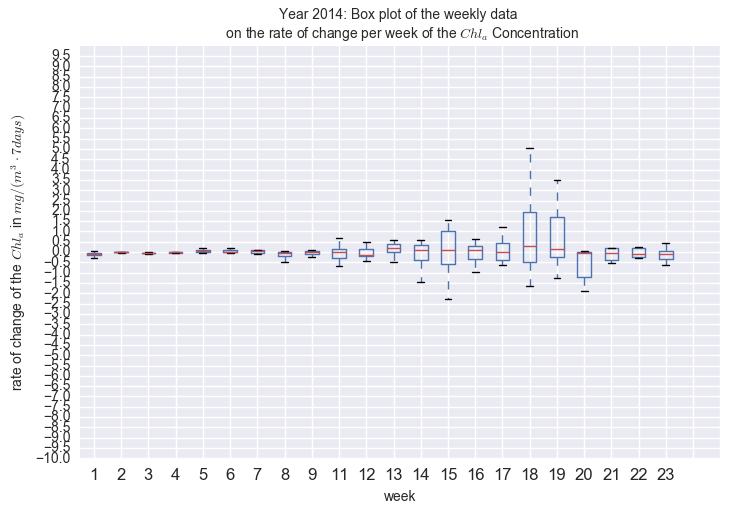


 summary statistics of chl_rate_week for the year 2015 

count    203.000000
mean       0.407297
std       16.206509
min     -170.856303
25%       -0.120601
50%        0.002884
75%        0.152675
max      101.774419
Name: chl_rate_week, dtype: float64


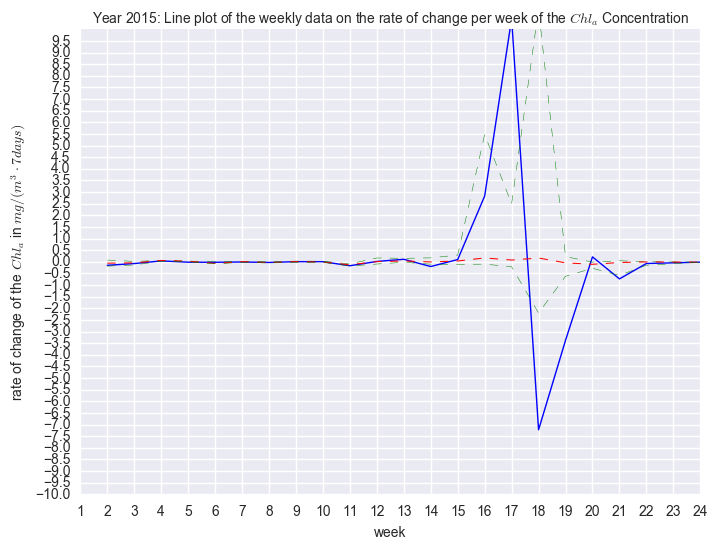

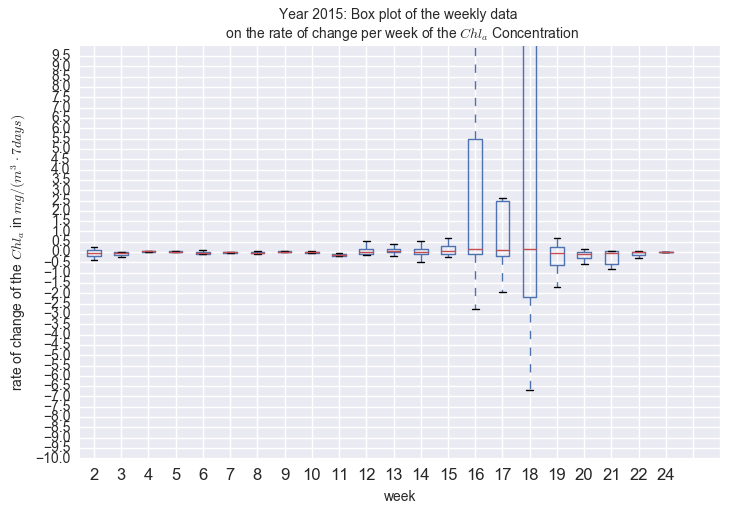


 summary statistics of chl_rate_week for the year 2016 

count    95.000000
mean      0.003738
std       0.798667
min      -4.408491
25%      -0.032954
50%       0.008736
75%       0.045045
max       4.844044
Name: chl_rate_week, dtype: float64


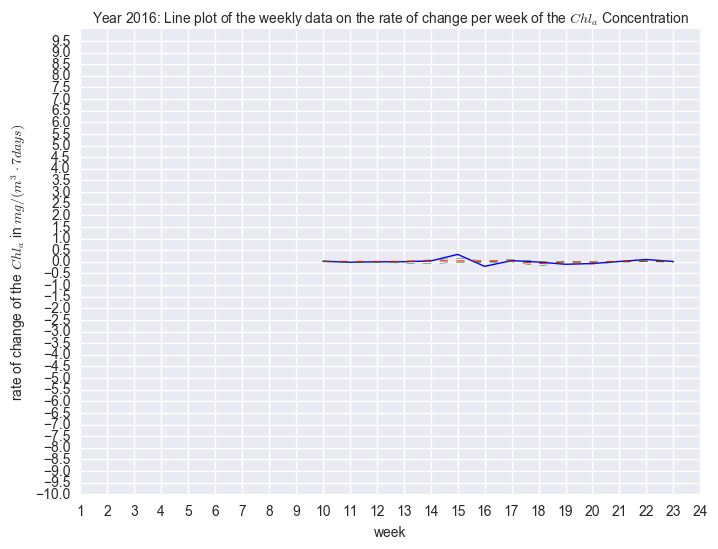

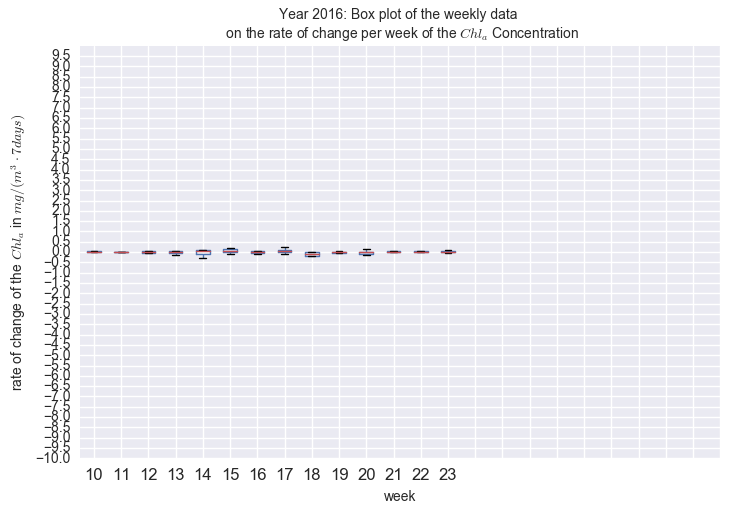

In [4]:
# [print(i) for i in range(year_min,year_max+1)]
# for  each year


for current_year in range(year_min, year_max+1):
    mask = df_timed.year == current_year
    df_yearly = df_timed[mask]

    print('\n summary statistics of chl_rate_week for the year %d \n' % (current_year) )
    print(df_yearly.chl_rate_week.describe())


    plt.figure(figsize=(8,6))
    axes1=df_yearly.groupby(['week_rotate'])['chl_rate_week'].mean().plot(linestyle="-",color='b', linewidth=1)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
    axes1.set_ylim(-10, 10)
    axes1.set_title("Year " + str(current_year) + ": Line plot of the weekly data on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()


    # http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
    #http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
    plt.figure(figsize=(8,6))
    axes2 = df_yearly.boxplot(column='chl_rate_week', by='week_rotate')
    axes2.set_ylim(-10, 10)
    #axes2.set_title("Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.title("Year " + str(current_year) + ": Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.suptitle("") # remove auto-title
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()
    # the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()